In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 96% 1.02G/1.06G [00:08<00:00, 141MB/s]
100% 1.06G/1.06G [00:08<00:00, 127MB/s]


In [ ]:
import zipfile

# Open the zip file
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')

# Extract all the contents to /content
zip_ref.extractall('/content')

# Close the zip file
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [ ]:
#data augmentation
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#create a CNN model with three CONVO layers
model=Sequential()
# layer 1
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid',strides=2))
#layer 2
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid',strides=2))
#layer 3
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid',strides=2))
# Flatten
model.add(Flatten())
#fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) #final output

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,validation_data=validation_generator,epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.5392 - loss: 2.8295

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 335s 518ms/step - accuracy: 0.5392 - loss: 2.8273 - val_accuracy: 0.5946 - val_loss: 0.6465
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 328s 525ms/step - accuracy: 0.5780 - loss: 0.6842 - val_accuracy: 0.6178 - val_loss: 0.7906
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 327s 522ms/step - accuracy: 0.6291 - loss: 0.6508 - val_accuracy: 0.7092 - val_loss: 0.5812
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 334s 535ms/step - accuracy: 0.6769 - loss: 0.6028 - val_accuracy: 0.7374 - val_loss: 0.5519
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 322s 514ms/step - accuracy: 0.6909 - loss: 0.5917 - val_accuracy: 0.7206 - val_loss: 0.5695
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 320s 511ms/step - accuracy: 0.7087 - loss: 0.5712 - val_accuracy: 0.6726 - val_loss: 0.6119
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 324s 518ms/step - accuracy: 0.7128 - loss: 0.5650 - val_accuracy: 0.7932 - val_loss: 0.4924
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 317s 506ms/step - accuracy: 0.7328 - loss: 0.54

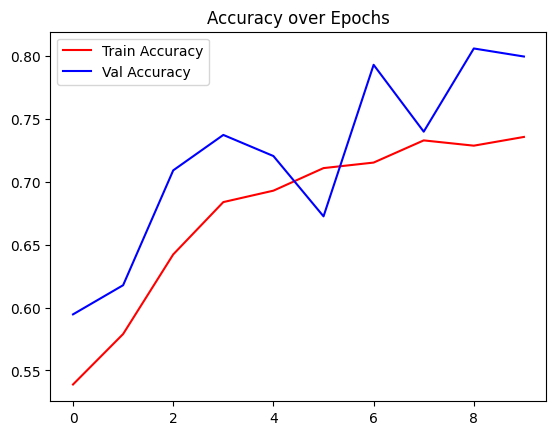

In [ ]:
# PLOT ACCURACY
# ========================
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='blue')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()

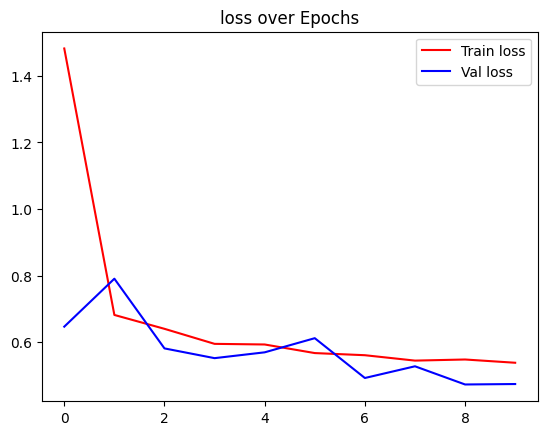

In [ ]:
# PLOT LOSS
# ========================

plt.plot(history.history['loss'], label='Train loss', color='red')
plt.plot(history.history['val_loss'], label='Val loss', color='blue')
plt.legend()
plt.title("loss over Epochs")
plt.show()

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score

# Step 1: Get true labels and predictions
y_true = []
y_pred = []

for images, labels in validation_generator:
    preds = model.predict(images)
    preds = (preds >= 0.5).astype(int).flatten()  # binary threshold

    y_pred.extend(preds)
    y_true.extend(labels.flatten())  # ✅ No .numpy()

    if len(y_true) >= validation_generator.samples:
        break

# Step 2: Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Validation Accuracy (sklearn): {acc*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━

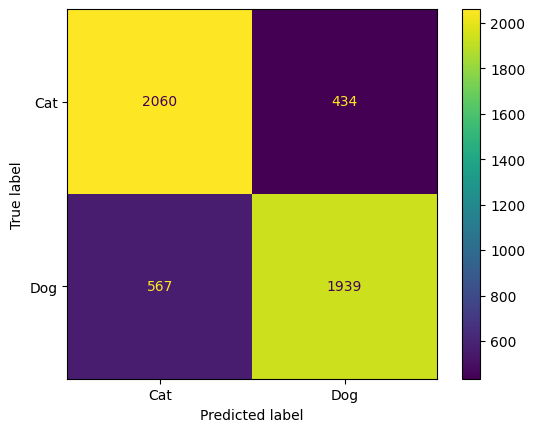

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Cat", "Dog"])
disp.plot()


In [ ]:
import cv2

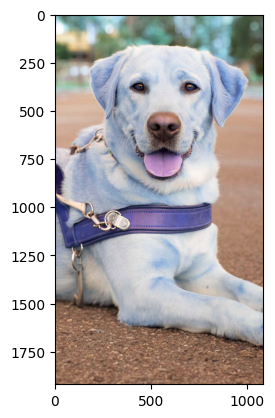

In [ ]:
test_img=cv2.imread('/content/dog.jpg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(1920, 1080, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))

# Normalize
test_input = test_input / 255.0

In [ ]:
y_pred=model.predict(test_input)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


array([[0.69451684]], dtype=float32)

In [ ]:
# Decision
if y_pred[0][0] >= 0.5:
    print("Prediction: 🐶 Dog")
else:
    print("Prediction: 🐱 Cat")

Prediction: 🐶 Dog
